**Problem 1.** Let $\xi_1,\xi_2,\ldots$ be a sequence of independent random variables from a given distribution. Provide a graphical illustration of the law of large numbers.

*Hint: for example, you can plot the sample mean $\frac{S_n}{n}$ as a function of $n$ and observe how it behaves as $n$ increases.*

$$
X \sim LogN(\mu=1, \sigma^2 = 9) \Rightarrow \ln X \sim N(1, 9)
$$

$$
\textbf{LLN.}
\frac{S_n}{n}
\xrightarrow[n\to\infty]{\mathbb P}
\mathbb E[\xi_1].
$$


$$
\mathbb{E}(\xi_i)=\int_{0}^{\infty} t \cdot \frac{1}{t \sqrt{2\pi \sigma^2}} e^{-\frac{(\ln t-\mu)^2}{2\sigma^2}} dt = e^{\mu + \frac{\sigma^2}{2}} = e^\frac{11}{2}
$$

https://en.wikipedia.org/wiki/Log-normal_distribution

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
mu, sigma = 1, 3
n = 1000000

In [17]:
expected_value = np.e ** (mu + sigma**2 / 2)

In [18]:
expected_value

244.69193226422033

In [19]:
ns = np.arange(1, n + 1)

In [20]:
def experiment(expected_value, ns, k):
    sns.set_theme(style="whitegrid")
    sns.set_context("talk")

    _, axes = plt.subplots(1, 2, figsize=(22, 8))

    for _ in range(k):
        xi = np.random.lognormal(mu, sigma, n)
        sample_means = np.cumsum(xi) / ns
        error = np.abs(sample_means - expected_value)
        sns.lineplot(x=ns, y=sample_means, ax=axes[0], linewidth=2)
        sns.lineplot(x=ns, y=error, ax=axes[1], linewidth=2)

    axes[0].axhline(expected_value, linestyle="--", linewidth=2, color="r")
    axes[0].set_xlabel("n")
    axes[0].set_ylabel(r"$\frac{S_n}{n}$")
    axes[0].set_title("Law of Large Numbers")
    axes[0].set_xscale("log")
    axes[0].set_yscale("log")

    axes[1].set_xlabel("n")
    axes[1].set_ylabel(r"$\left|\frac{S_n}{n}-\mathbb{E}[\xi_1]\right|$")
    axes[1].set_title("LLN Error")
    axes[1].set_xscale("log")
    axes[1].set_yscale("log")

    plt.tight_layout()
    plt.show()

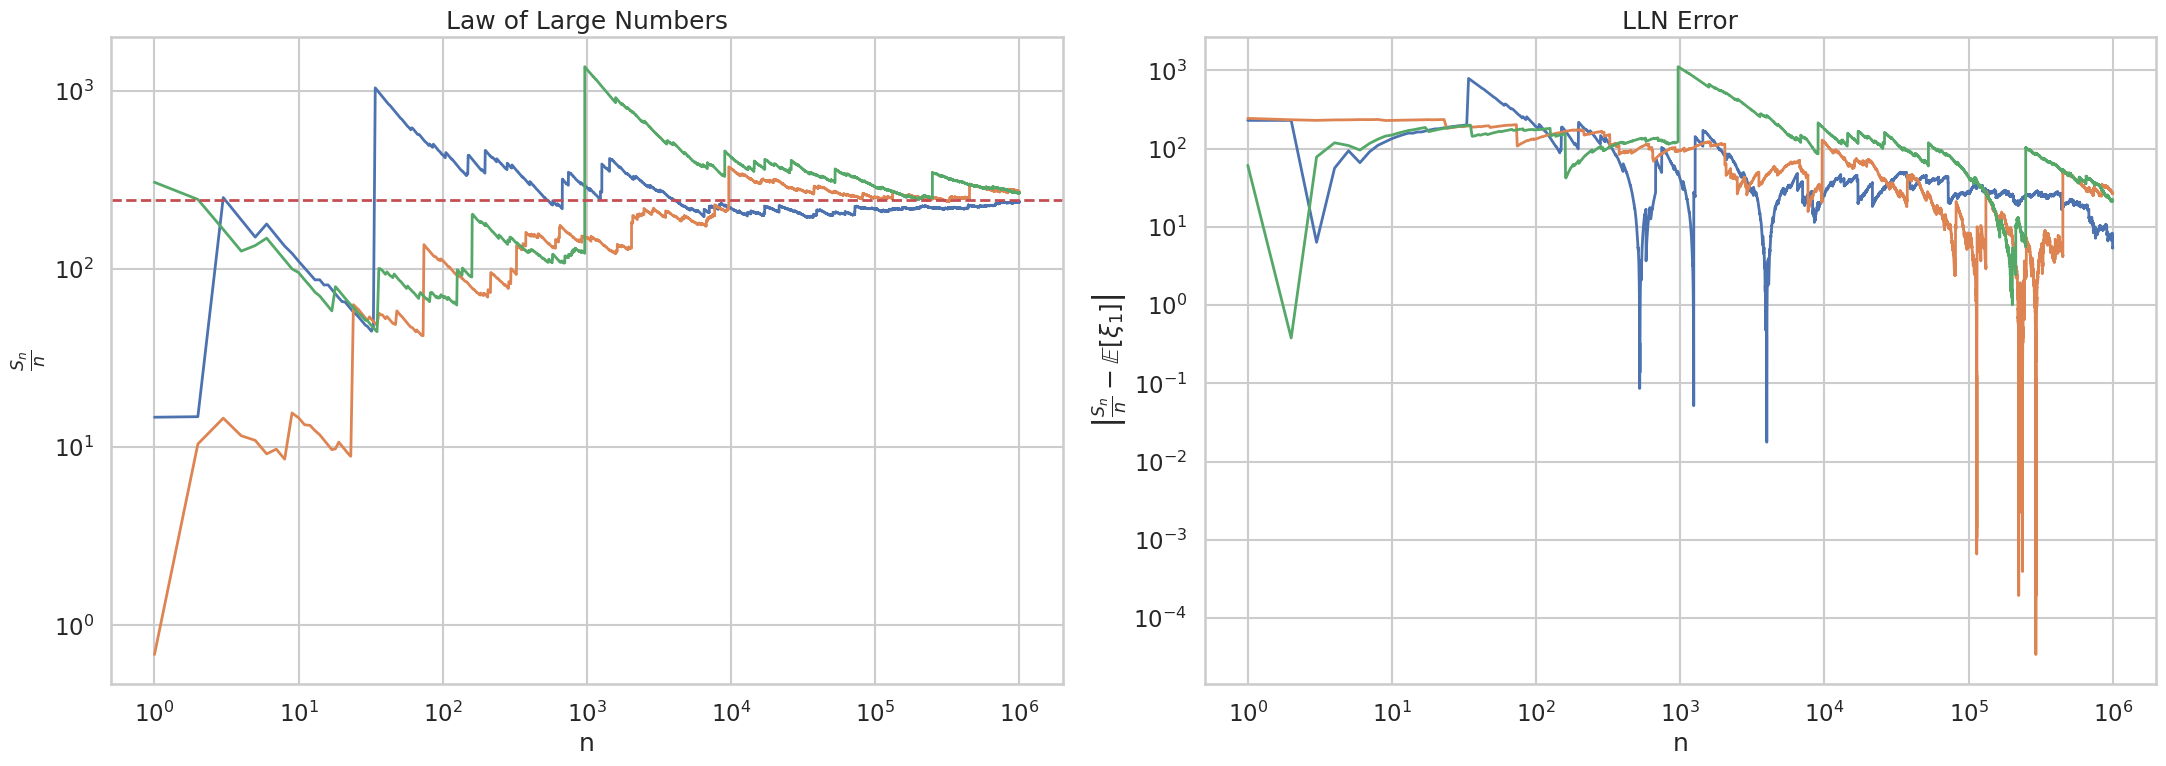

In [21]:
experiment(expected_value, ns, 3)